In [1]:
data <- read.csv('insurance.csv', header=TRUE)

In [2]:
library(tidyverse)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
data <- transform(data, sex = as.factor(sex), 
              children = as.factor(children), 
              smoker = as.factor(smoker),
                region = as.factor(region))

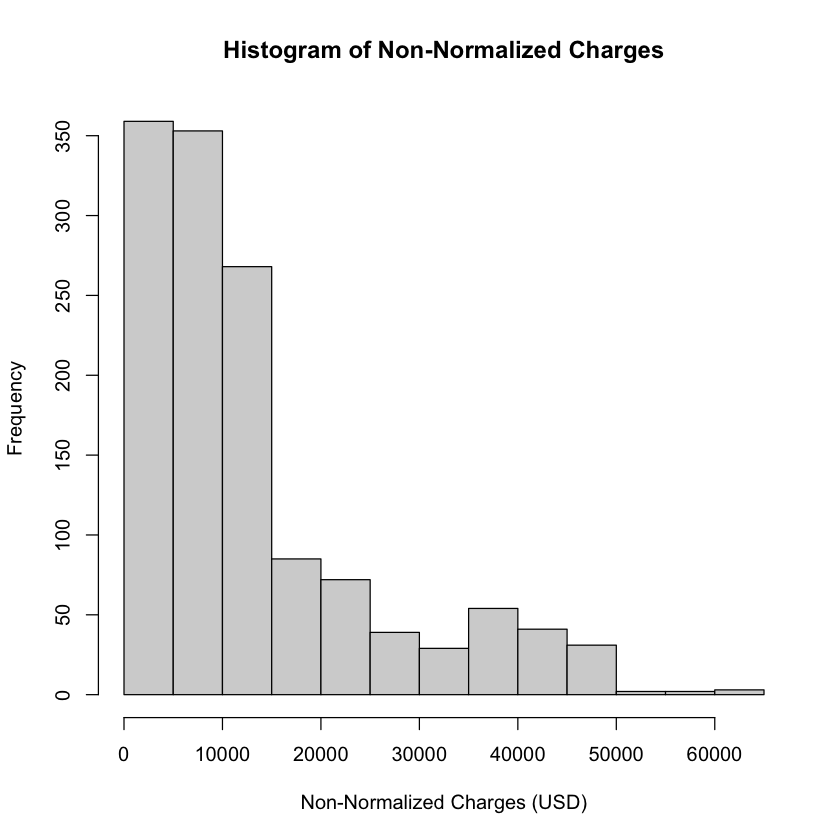

In [4]:
hist(data$charges, xlab = "Non-Normalized Charges (USD)", main = paste("Histogram of Non-Normalized Charges"))

In [5]:
data = mutate(data, norm_charges = log(charges))

In [6]:
data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,northwest,21984.471,9.998092
32,male,28.880,0,no,northwest,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,northwest,7281.506,8.893093
37,male,29.830,2,no,northeast,6406.411,8.765054


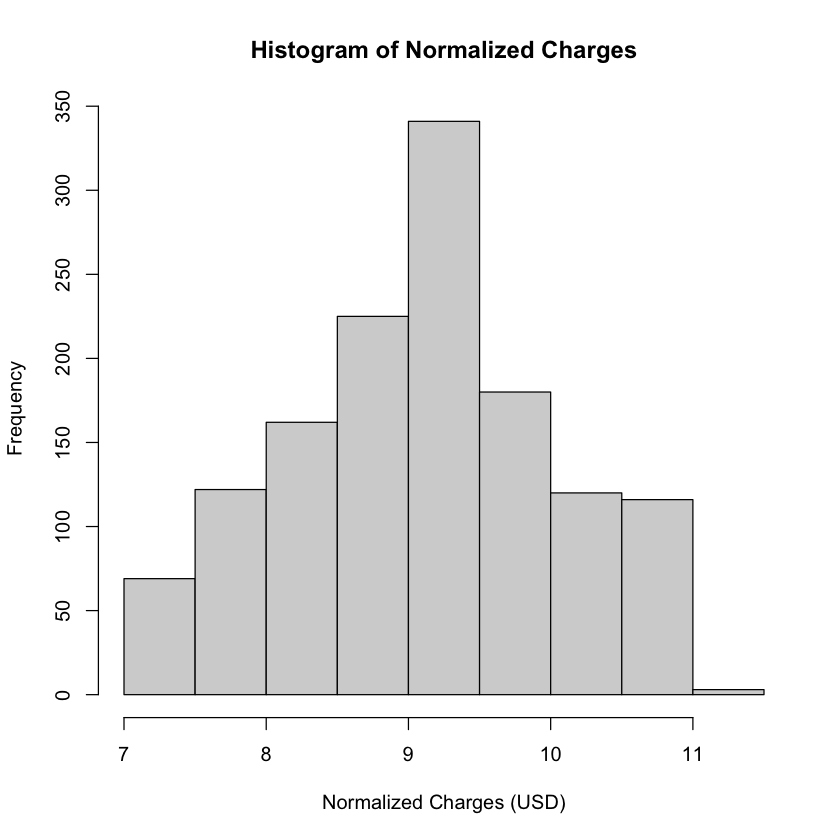

In [7]:
hist(data$norm_charges, xlab = "Normalized Charges (USD)", main = paste("Histogram of Normalized Charges"))

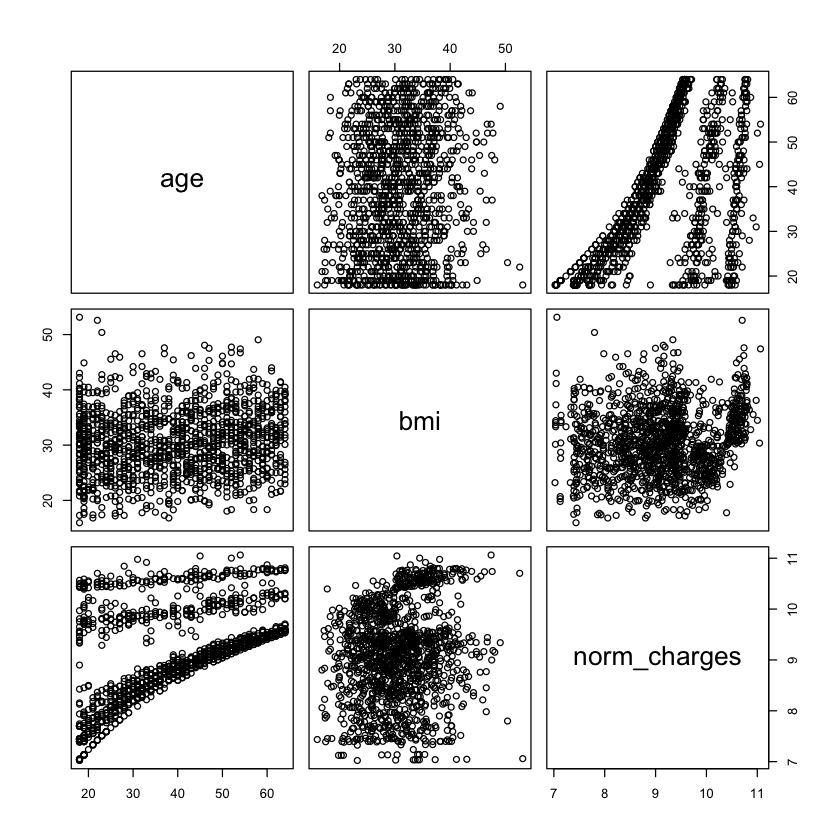

In [8]:
quant_data <- subset(data, select = c(age, bmi, norm_charges))
pairs(quant_data)

In [9]:
library(ggplot2)

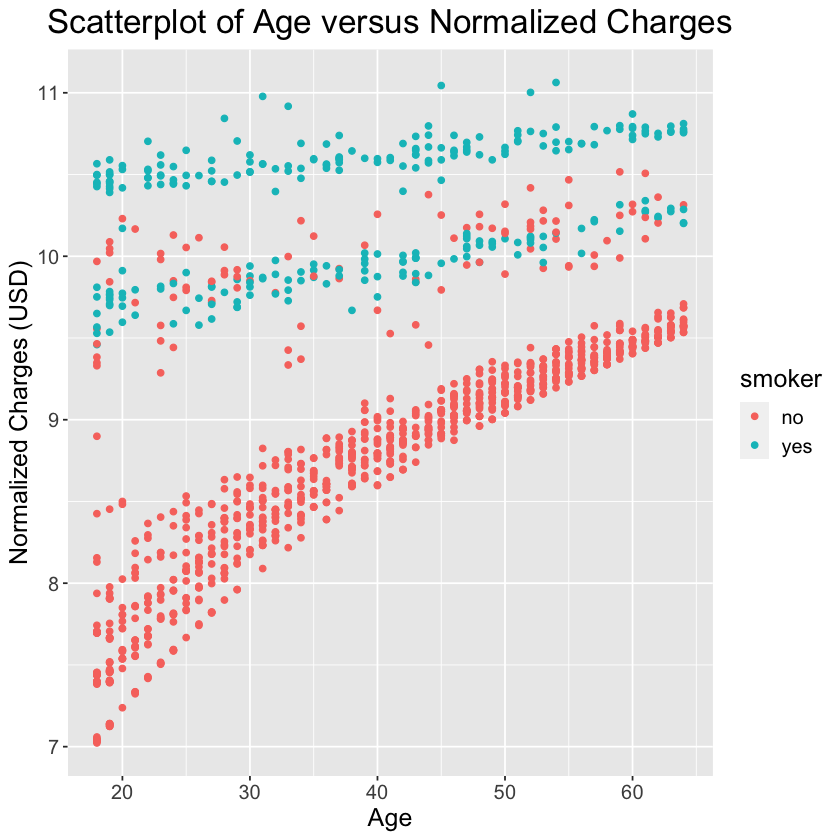

In [10]:
ggplot(data, aes(age, norm_charges, col = smoker))+
    geom_point() +
    labs( x = "Age", y = "Normalized Charges (USD)") + 
    ggtitle("Scatterplot of Age versus Normalized Charges") +
    theme(text = element_text(hjust = 0.5, size = 15)) +
    theme(plot.title = element_text(hjust= 0.5, size= 20))

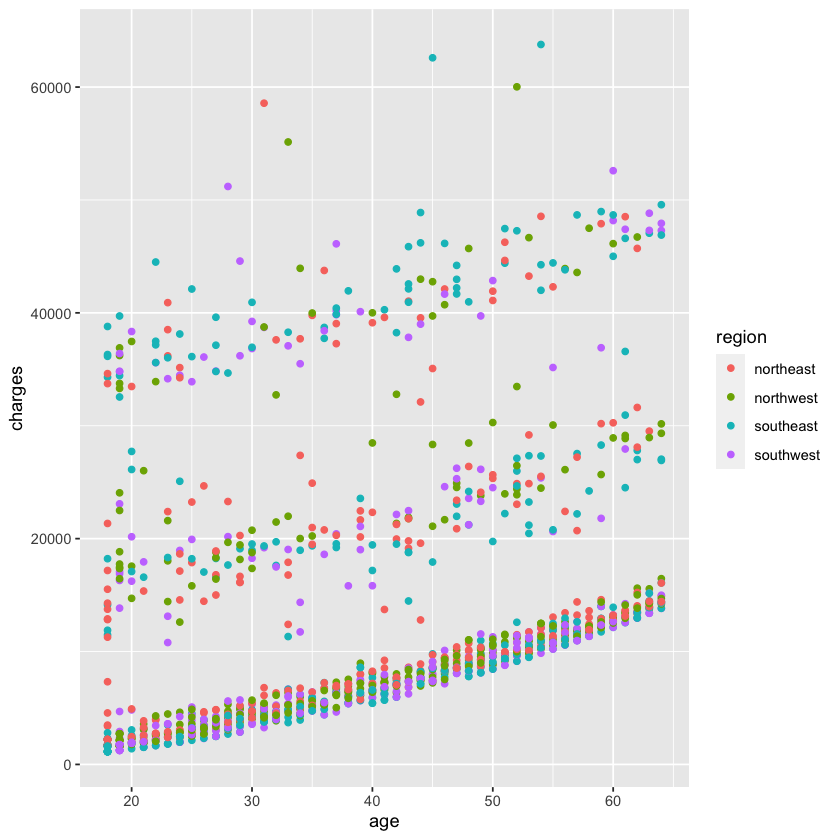

In [11]:
ggplot(data, aes(age, charges, col = region))+geom_point()

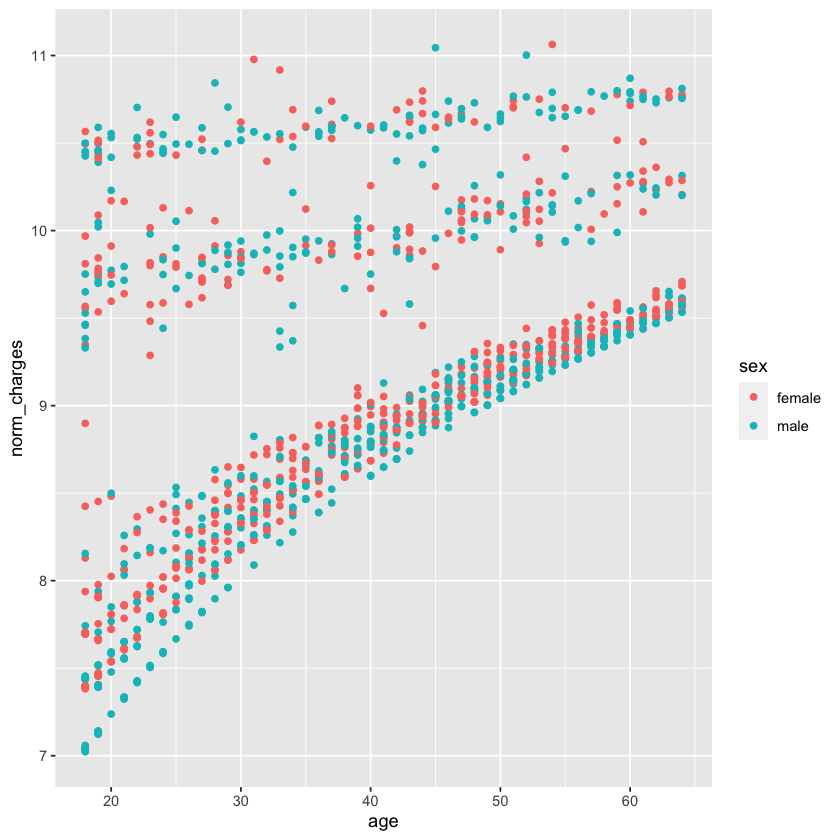

In [12]:
ggplot(data, aes(age, norm_charges, col = sex))+geom_point()

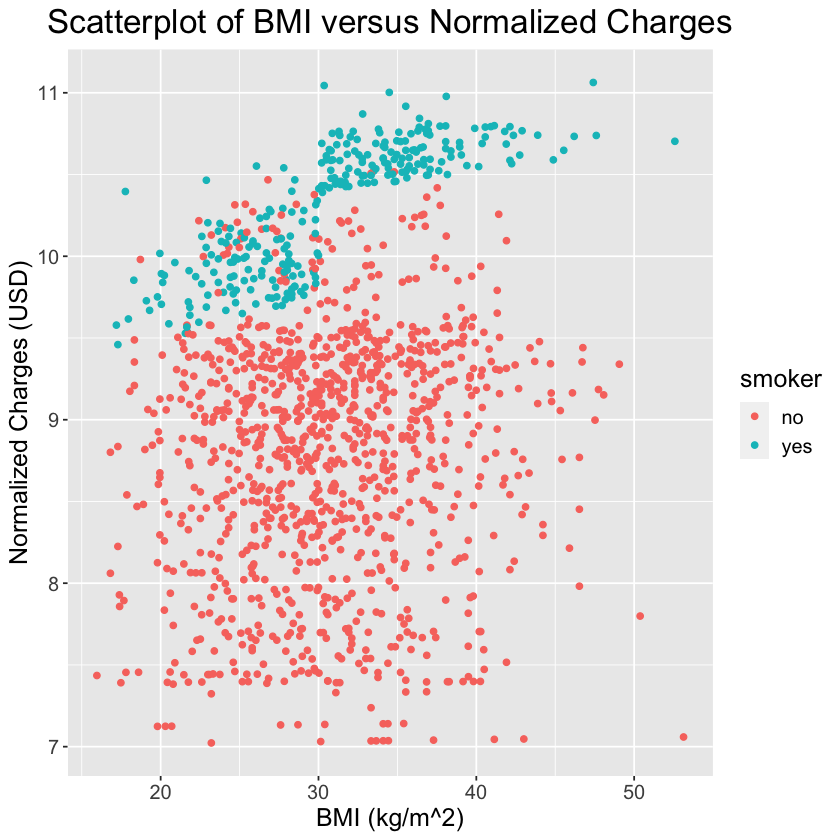

In [13]:
ggplot(data, aes(bmi, norm_charges, col = smoker)) +
    geom_point() + 
    labs( x = "BMI (kg/m^2)", y = "Normalized Charges (USD)") + 
    ggtitle("Scatterplot of BMI versus Normalized Charges") +
    theme(text = element_text(hjust = 0.5, size = 15)) +
    theme(plot.title = element_text(hjust= 0.5, size= 20))

In [14]:
data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,northwest,21984.471,9.998092
32,male,28.880,0,no,northwest,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,northwest,7281.506,8.893093
37,male,29.830,2,no,northeast,6406.411,8.765054


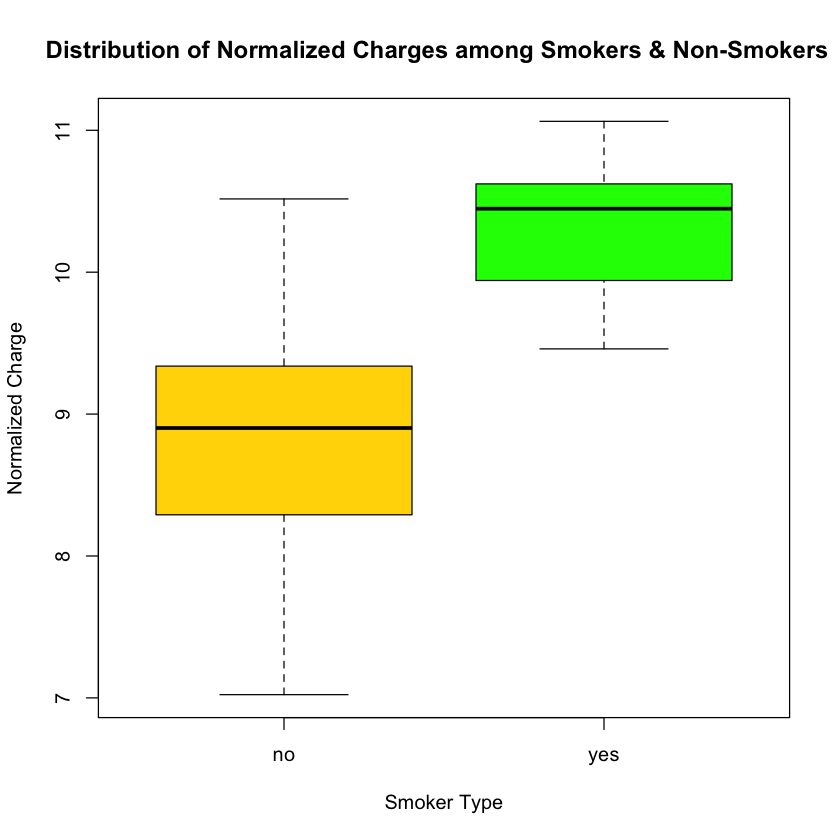

In [15]:
boxplot(norm_charges~smoker, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="Distribution of Normalized Charges among Smokers & Non-Smokers  ", xlab="Smoker Type", ylab = "Normalized Charge")

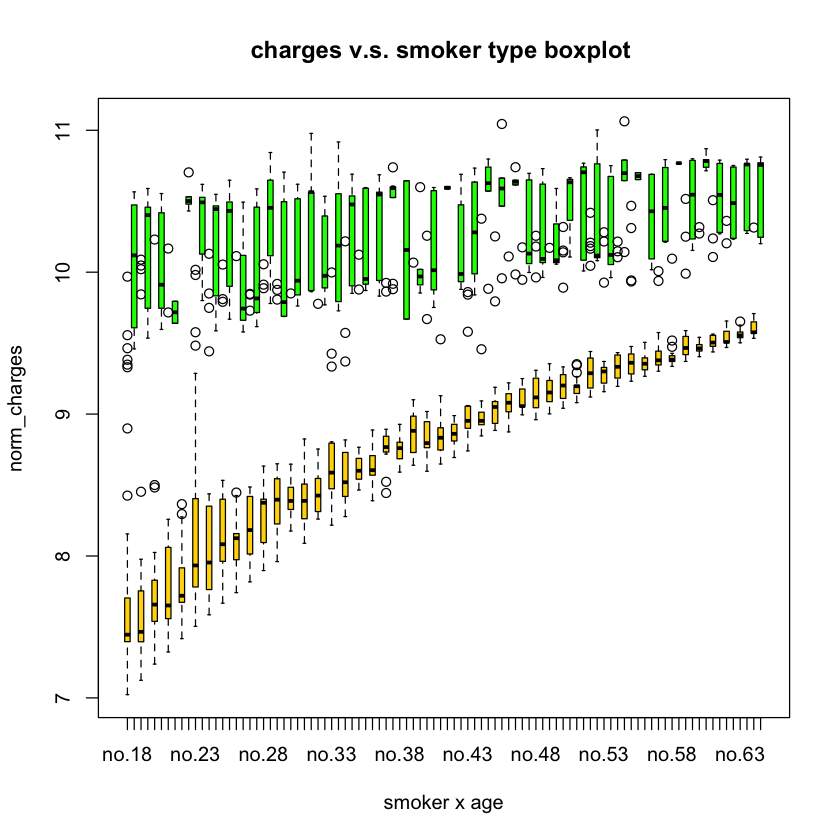

In [16]:
boxplot(norm_charges~smoker*age, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="smoker x age")

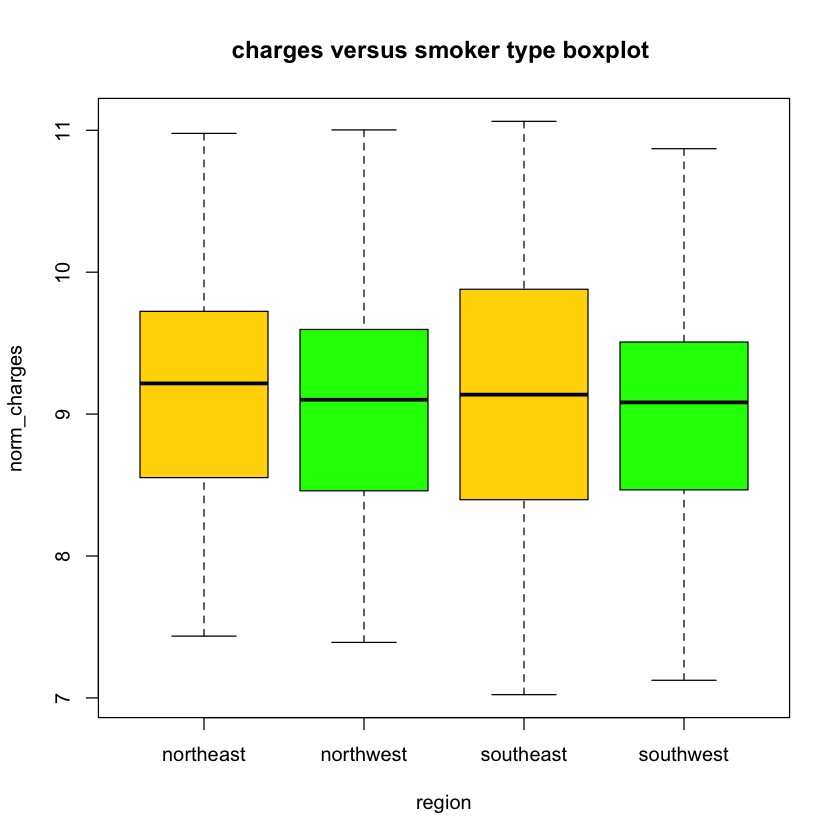

In [17]:
boxplot(norm_charges~region, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges versus smoker type boxplot ", xlab="region")

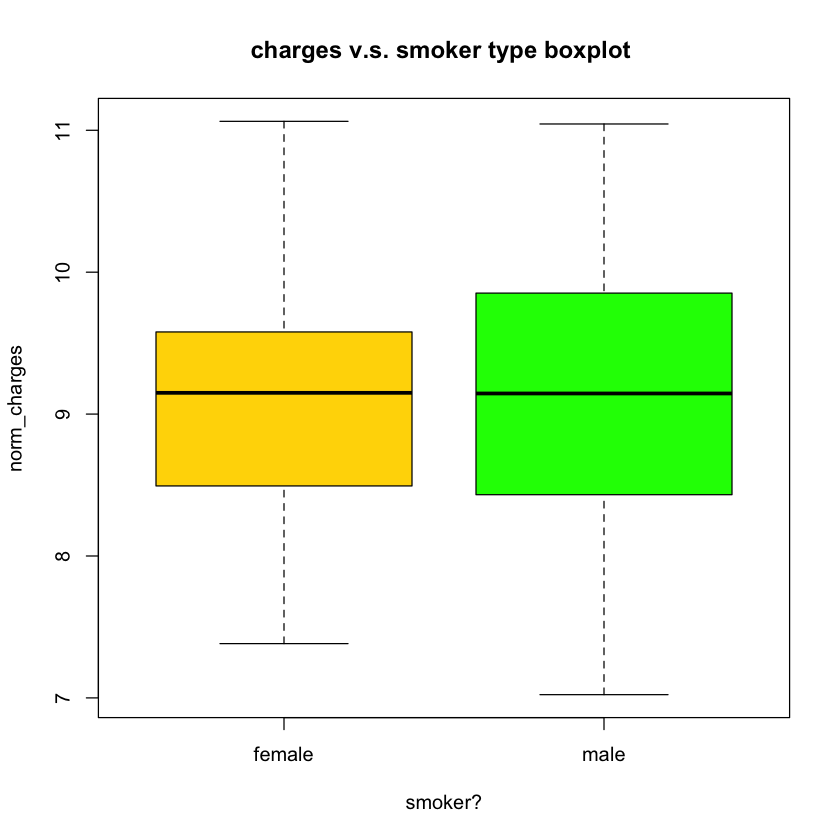

In [18]:
boxplot(norm_charges~sex, data=data, notch=FALSE,
  col=(c("gold","green")),
  main="charges v.s. smoker type boxplot ", xlab="smoker?")

In [19]:
library(leaps)
s <- regsubsets(norm_charges~.+age*smoker+bmi*smoker, data=subset(data, select = -c(charges)), method="exhaustive", nvmax = 14)

In [105]:
s.sum <- summary(s)

In [106]:
matrix_sum_df <- data.frame(
    num_param = c(2:15),
    Adj.R2 = s.sum$adjr2,
    CP = s.sum$cp,
    BIC = s.sum$bic)

In [164]:
matrix_sum_df <- matrix_sum_df[3:14,]
matrix_sum_df

,num_param,Adj.R2,CP,BIC
,<int>,<dbl>,<dbl>,<dbl>
3,4,0.7857887,305.57868,-2035.790
4,5,0.7987971,207.10322,-2113.419
5,6,0.8047166,162.82224,-2147.179
6,7,0.8086628,133.64093,-2168.300
7,8,0.8128207,102.89447,-2191.503
8,9,0.8162755,77.54292,-2210.237
9,10,0.8193133,55.40121,-2226.353
10,11,0.8213318,41.03610,-2235.194
11,12,0.8228480,30.50622,-2240.406


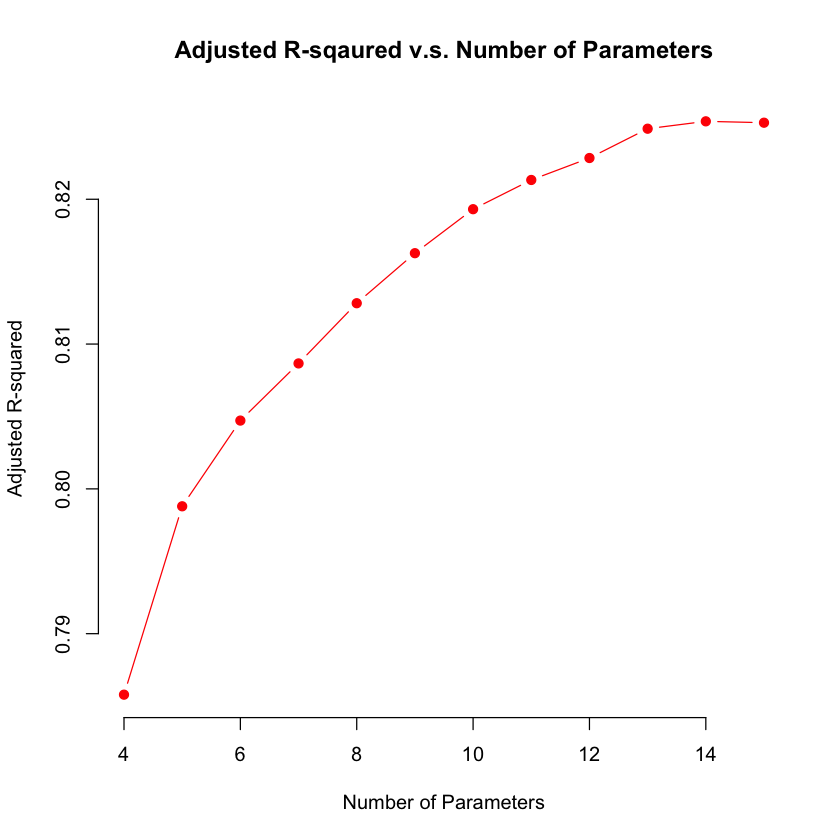

In [119]:
plot(matrix_sum_df$num_param, matrix_sum_df$Adj.R2, type = "b", frame = FALSE, pch = 19, col = "red", xlab="Number of Parameters", ylab = "Adjusted R-squared")
title("Adjusted R-sqaured v.s. Number of Parameters")

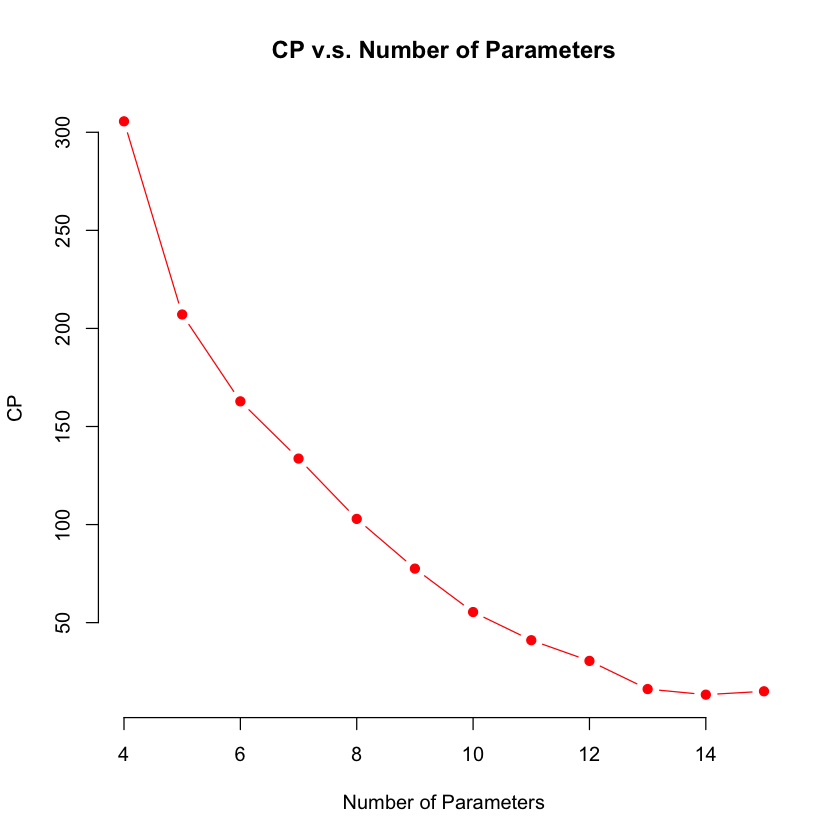

In [120]:
plot(matrix_sum_df$num_param, matrix_sum_df$CP, type = "b", frame = FALSE, pch = 19, col = "red", xlab="Number of Parameters", ylab = "CP")
title("CP v.s. Number of Parameters")

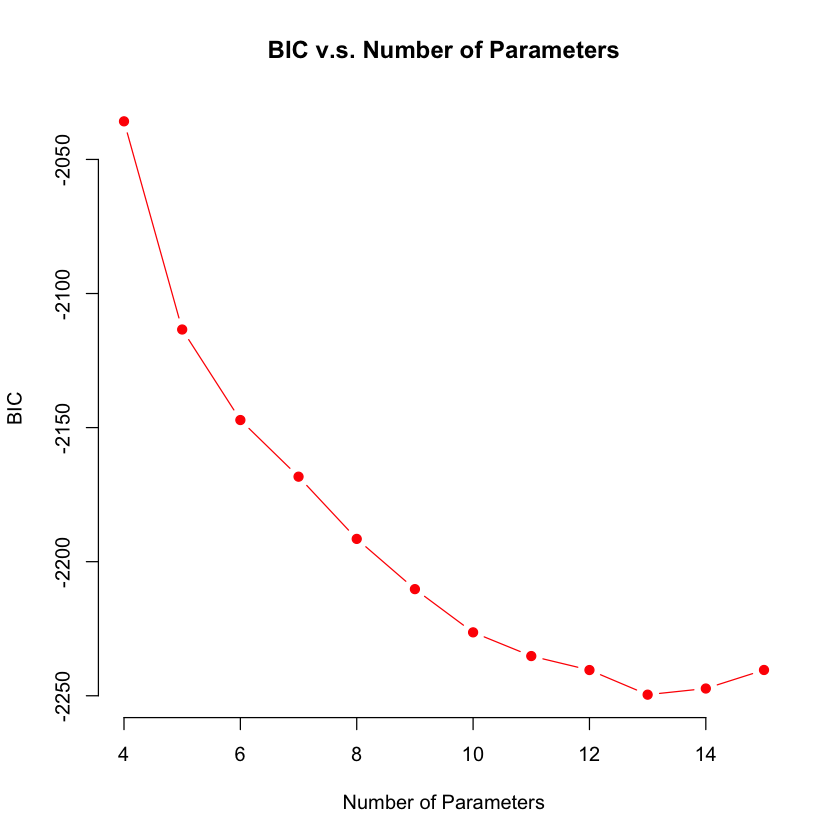

In [121]:
plot(matrix_sum_df$num_param, matrix_sum_df$BIC, type = "b", frame = FALSE, pch = 19, col = "red", xlab="Number of Parameters", ylab = "BIC")
title("BIC v.s. Number of Parameters")

In [110]:
s.sum

Subset selection object
Call: regsubsets.formula(norm_charges ~ . + age * smoker + bmi * smoker, 
    data = subset(data, select = -c(charges)), method = "exhaustive", 
    nvmax = 14)
14 Variables  (and intercept)
                Forced in Forced out
age                 FALSE      FALSE
sexmale             FALSE      FALSE
bmi                 FALSE      FALSE
children1           FALSE      FALSE
children2           FALSE      FALSE
children3           FALSE      FALSE
children4           FALSE      FALSE
children5           FALSE      FALSE
smokeryes           FALSE      FALSE
regionnorthwest     FALSE      FALSE
regionsoutheast     FALSE      FALSE
regionsouthwest     FALSE      FALSE
age:smokeryes       FALSE      FALSE
bmi:smokeryes       FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: exhaustive
          age sexmale bmi children1 children2 children3 children4 children5
1  ( 1 )  " " " "     " " " "       " "       " "       " "       " "      
2  ( 1 )  "*" 

In [24]:
optimal_lm <- lm(norm_charges~age+sex+children+smoker+region+age*smoker+bmi*smoker, data=data)

In [25]:
summary(optimal_lm)


Call:
lm(formula = norm_charges ~ age + sex + children + smoker + region + 
    age * smoker + bmi * smoker, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63156 -0.15422 -0.07901  0.00876  2.34424 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.1135940  0.0700449 101.558  < 2e-16 ***
age              0.0416369  0.0008468  49.171  < 2e-16 ***
sexmale         -0.0859366  0.0211416  -4.065 5.09e-05 ***
children1        0.1570146  0.0267389   5.872 5.43e-09 ***
children2        0.2900452  0.0296136   9.794  < 2e-16 ***
children3        0.2568288  0.0347744   7.386 2.68e-13 ***
children4        0.5107771  0.0786310   6.496 1.17e-10 ***
children5        0.4901884  0.0924123   5.304 1.32e-07 ***
smokeryes        1.2898902  0.1452394   8.881  < 2e-16 ***
regionnorthwest -0.0665231  0.0302401  -2.200    0.028 *  
regionsoutheast -0.1479378  0.0304143  -4.864 1.29e-06 ***
regionsouthwest -0.1519882  0.0303533  -5.007 6.26

In [26]:
new_data <- data

In [27]:
new_data$region <- as.character(new_data$region)

In [28]:
new_data$region[new_data$region == "northwest" | new_data$region == "northeast"] <- "north"

In [29]:
new_data$region <- as.factor(new_data$region)

In [30]:
new_data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,north,21984.471,9.998092
32,male,28.880,0,no,north,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,north,7281.506,8.893093
37,male,29.830,2,no,north,6406.411,8.765054


In [31]:
optimal_lm_12 <- lm(norm_charges~age+sex+children+smoker+region+age*smoker+bmi*smoker, data=new_data)

In [32]:
summary(optimal_lm_12)


Call:
lm(formula = norm_charges ~ age + sex + children + smoker + region + 
    age * smoker + bmi * smoker, data = new_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63147 -0.15755 -0.07847  0.00539  2.34386 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.078921   0.068347 103.573  < 2e-16 ***
age              0.041655   0.000848  49.123  < 2e-16 ***
sexmale         -0.085731   0.021172  -4.049 5.44e-05 ***
children1        0.156490   0.026777   5.844 6.40e-09 ***
children2        0.287073   0.029626   9.690  < 2e-16 ***
children3        0.254371   0.034807   7.308 4.67e-13 ***
children4        0.511247   0.078745   6.492 1.19e-10 ***
children5        0.493231   0.092536   5.330 1.15e-07 ***
smokeryes        1.298951   0.145391   8.934  < 2e-16 ***
regionsoutheast -0.114785   0.026456  -4.339 1.54e-05 ***
regionsouthwest -0.118768   0.026368  -4.504 7.25e-06 ***
bmi              0.001122   0.002038   0.550    0.582    


In [33]:
summary(optimal_lm)


Call:
lm(formula = norm_charges ~ age + sex + children + smoker + region + 
    age * smoker + bmi * smoker, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63156 -0.15422 -0.07901  0.00876  2.34424 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.1135940  0.0700449 101.558  < 2e-16 ***
age              0.0416369  0.0008468  49.171  < 2e-16 ***
sexmale         -0.0859366  0.0211416  -4.065 5.09e-05 ***
children1        0.1570146  0.0267389   5.872 5.43e-09 ***
children2        0.2900452  0.0296136   9.794  < 2e-16 ***
children3        0.2568288  0.0347744   7.386 2.68e-13 ***
children4        0.5107771  0.0786310   6.496 1.17e-10 ***
children5        0.4901884  0.0924123   5.304 1.32e-07 ***
smokeryes        1.2898902  0.1452394   8.881  < 2e-16 ***
regionnorthwest -0.0665231  0.0302401  -2.200    0.028 *  
regionsoutheast -0.1479378  0.0304143  -4.864 1.29e-06 ***
regionsouthwest -0.1519882  0.0303533  -5.007 6.26

In [34]:
exp(mean(optimal_lm$residuals))

[1] 1

In [37]:
exp(mean(optimal_lm_12$residuals))

[1] 1

In [48]:
new <- data.frame(data[1,])
new

,age,sex,bmi,children,smoker,region,charges,norm_charges
,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,19,female,27.9,0,yes,southwest,16884.92,9.734176


In [50]:
exp(predict(optimal_lm, new, interval = "prediction", level = 0.95))

,fit,lwr,upr
1,19052.89,8912.656,40730.03


In [53]:
sqrt(sum((optimal_lm$residuals)^2)/1323)

[1] 0.3843509

In [58]:
sqrt(sum(exp(optimal_lm$residuals^2))/1338)

[1] 1.401814

In [57]:
data

age,sex,bmi,children,smoker,region,charges,norm_charges
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176
18,male,33.770,1,no,southeast,1725.552,7.453302
28,male,33.000,3,no,southeast,4449.462,8.400538
33,male,22.705,0,no,northwest,21984.471,9.998092
32,male,28.880,0,no,northwest,3866.855,8.260197
31,female,25.740,0,no,southeast,3756.622,8.231275
46,female,33.440,1,no,southeast,8240.590,9.016827
37,female,27.740,3,no,northwest,7281.506,8.893093
37,male,29.830,2,no,northeast,6406.411,8.765054


In [157]:
pred_data = data
pred_data$predict = exp(optimal_lm$fitted.values)
pred_data$diff_sq = (pred_data$charges - pred_data$predict)^2
pred_data$diff <- pred_data$charges- pred_data$predict
pred_data$predict_norm = optimal_lm$fitted.values
pred_data$diff_norm <- pred_data$norm_charges - pred_data$predict_norm
pred_data

age,sex,bmi,children,smoker,region,charges,norm_charges,predict,diff_sq,diff,predict_norm,diff_norm
<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,female,27.900,0,yes,southwest,16884.924,9.734176,19052.893,4700091.59,-2167.9695,9.854974,-0.120797825
18,male,33.770,1,no,southeast,1725.552,7.453302,2496.784,594798.44,-771.2318,7.822759,-0.369456359
28,male,33.000,3,no,southeast,4449.462,8.400538,4180.176,72514.95,269.2860,8.338109,0.062429839
33,male,22.705,0,no,northwest,21984.471,9.998092,4271.556,313747334.46,17712.9143,8.359734,1.638358096
32,male,28.880,0,no,northwest,3866.855,8.260197,4124.837,66554.57,-257.9817,8.324782,-0.064584918
31,female,25.740,0,no,southeast,3756.622,8.231275,3961.062,41795.79,-204.4402,8.284267,-0.052992075
46,female,33.440,1,no,southeast,8240.590,9.016827,8726.957,236552.77,-486.3669,9.074172,-0.057344790
37,female,27.740,3,no,northwest,7281.506,8.893093,7147.355,17996.46,134.1509,8.874498,0.018595333
37,male,29.830,2,no,northeast,6406.411,8.765054,7263.109,733931.44,-856.6980,8.890563,-0.125508770


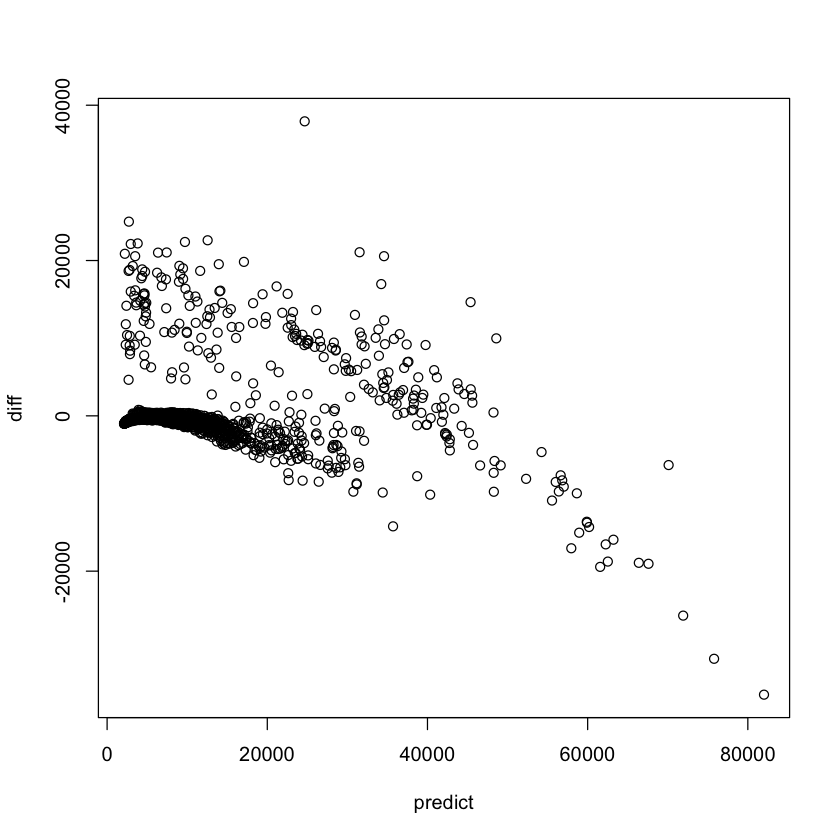

In [158]:
plot(diff~predict, data = pred_data)

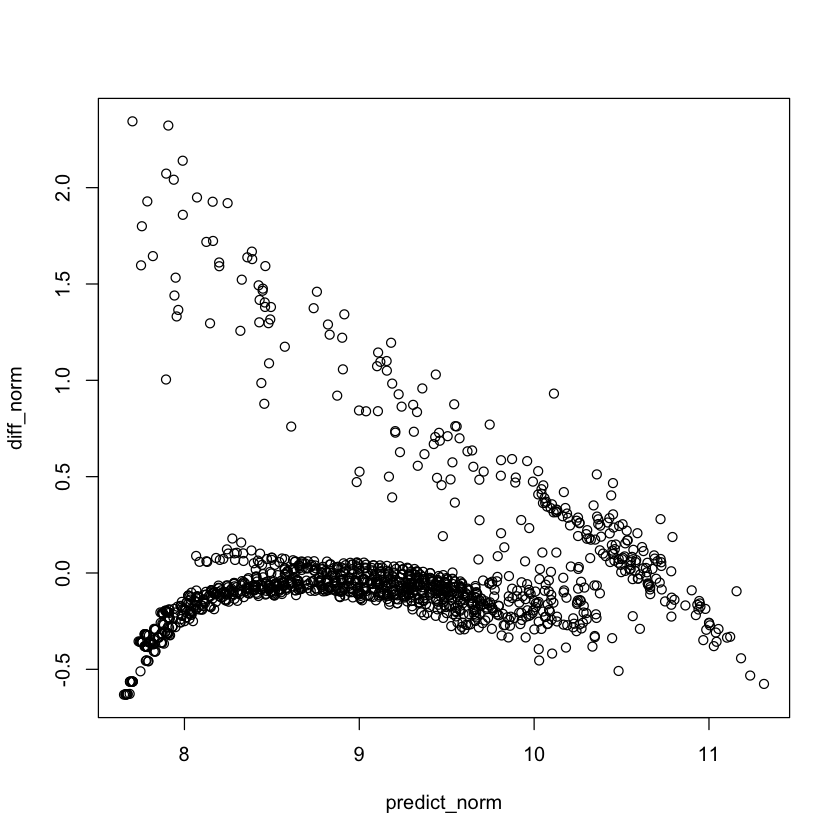

In [159]:
plot(diff_norm~predict_norm, data = pred_data)

In [70]:
sqrt(sum(pred_data$diff_sq)/1338)

[1] 5558.699

In [71]:
sqrt(sum(pred_data$diff_sq)/1323)

[1] 5590.122

In [160]:
coef_df <- data.frame(sort(abs(optimal_lm_12$coefficients), decreasing = TRUE))
colnames(coef_df) <- c("AbsCoeffs")
coef_df

,AbsCoeffs
,<dbl>
(Intercept),7.078921421
smokeryes,1.298950719
children4,0.511247496
children5,0.493231410
children2,0.287073524
children3,0.254371157
children1,0.156490028
regionsouthwest,0.118767733
regionsoutheast,0.114785325


ERROR: Error in order(AbsCoeffs): object 'AbsCoeffs' not found
